# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola levando à nota zero na prova
- Renomear o notebook para NOME_SOBRENOME_MATRICULA
- Enviar o arquivo .ipynb na tarefa do TEAMS.

## Nome 

## Matrícula

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - Um vídeo tem uma taxa de atualização de **28 fps**. Se a função fl_image(func) for
aplicada num intervalo do segundo 3 ao segundo 5, pode-se afirmar que a função **func** foi
aplicada em **84 quadros**.

In [ ]:
#F - Entre 3 e 5 segundos existem 2 segundos, 2*28 = 56

2 - Um áudio pode ser representado através de uma matriz NxM em que N é são as amostras e M a profundidade de bits do áudio.

In [ ]:
#F - NxM significa amostras e quantidade de canais

3 - Na compressão DIABOLICA quanto maior o tamanho do quadro utilizado para fazer os cortes na imagem original melhor será a compressão e pior será a qualidade final da imagem.

In [10]:
#V

4 - Apesar de ser possível colocar informações diferentes nos dois canais de um áudio stereo, isso é considerado um erro, o certo é sempre ter a mesma informação repetida nos dois canais do áudio.

In [2]:
#F - É muito comum colocar duas informações diferentes nos canais de audio, 
# para criar efeitos diferentes para cada orelha em um fone por exemplo.

5 - O Formato de imagem **.jpeg** é muito utilizado na internet por ser leve e suportar o canal alpha de transparência.

In [ ]:
#F JPEG não aceita transparencia

# Parte prática

## Material de apoio

### Importações

```python
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
```

### Histograma
```python
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```

### Manipulação de imagens

```python
(l,c,p) = img.shape
plt.imshow(imagem)
```

### Forçando uma imagem de uma página para 3 páginas
```python
  imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
  imagem_3p[:,:, 0] = frame_1p
  imagem_3p[:,:, 1] = frame_1p
  imagem_3p[:,:, 2] = frame_1p
```

### Detecção de bordas
```python
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255
```

### Manipulação de vídeo
```python
video = mpe.VideoFileClip("video.mp4")
frame = video.get_frame(2 / video.fps)
frame = video.get_frame(2)
video.ipython_display(width=480)
video_modificado = video.fl_image(func_modificar)
subclip = video.subclip(0,2)
subclip = video.subclip(3)
parts = mpe.concatenate_videoclips([part1, part])
video.write_videofile('video.mp4')
```

### Conversão CM|Y


#### Iterativo 
```python
img_cmy = np.zeros(shape=img_rgb.shape, dtype=np.float64)
for i in range(l):
    for j in range(c):
        r = img_rgb[i, j, 0]
        g = img_rgb[i, j, 1]
        b = img_rgb[i, j, 2]
        
        img_cmy[i, j, 0] = (255 - r) / 255 # C
        img_cmy[i, j, 1] = (255 - g) / 255 # M
        img_cmy[i, j, 2] = (255 - b) / 255 # Y

```
#### Numpy
```python
    img_cmy = 255 - img_rgb
```

### Reflexão

#### Iterativo
```python 
    img_refl = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_x = j
            new_y = -i
            img_refl[new_y, new_x] = img[i, j]
```
#### Numpy
```python
    img_refl = np.zeros(shape=imagem.shape, dtype=np.uint8)
    img_refl[::-1, ::1] = imagem
```


**1 -** Importe as bibliotecas que serão usadas

In [2]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt

**2 -** Abra o vídeo "boydancing.mp4" e salve-o em uma variável, pegue o **frame do indice 3** e o exiba.

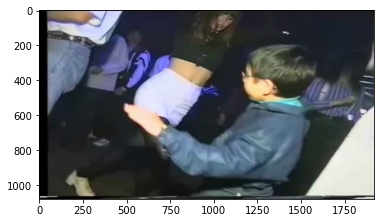

In [3]:
video = mpe.VideoFileClip("boydancing.mp4")

frame = video.get_frame(3/video.fps)
plt.imshow(frame)

**3 -** Exiba o histograma RGB do frame selecionado.

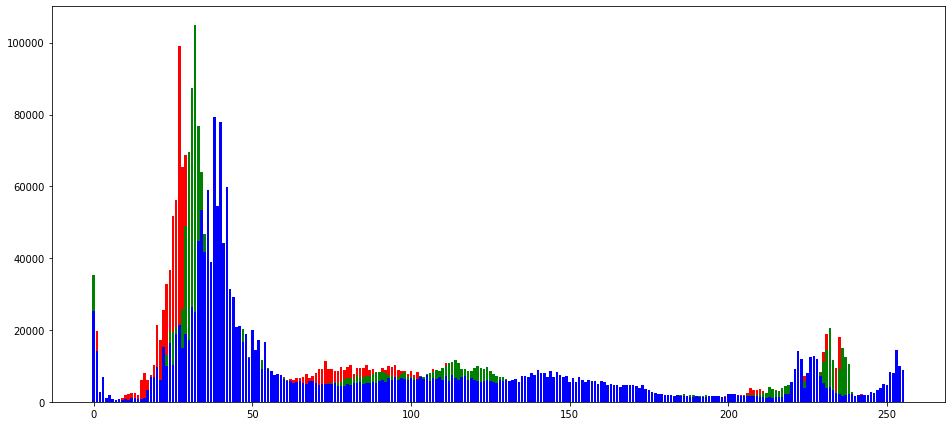

In [4]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
    
show_histogram(frame)

**4 -** Crie uma função que receba um **frame como parâmetro** e retorne um frame **refletido no eixo Y**, aplique essa função **frame selecionado na questão 2** e exiba o resultado. 

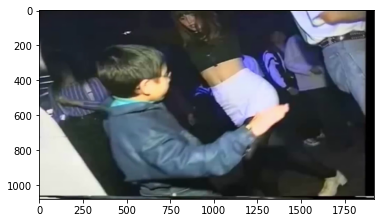

In [5]:
def reflect(frame):
    img_refl = np.zeros(shape=frame.shape, dtype=np.uint8)
    img_refl[::1, ::-1] = frame
    return img_refl

frame_reflect = reflect(frame)
plt.imshow(frame_reflect)

**5 -** Crie uma função que receba um frame e realize a detecção de bordas nele com **treshold de valor 9**, aplique essa função no frame selecionado na questão 2 e exiba o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

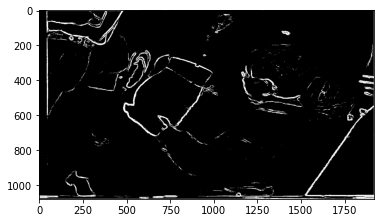

In [6]:
def deteccao_bordas(frame):
    (l,c,p) = frame.shape
    
    frame_bw = np.average(frame, axis=2).astype(np.float64)
    
    abs_tg_c = np.abs(np.diff(frame_bw.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(frame_bw.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    threshold = 9
    frame_border = np.zeros(shape=(l, c), dtype=np.uint8)
    frame_border[abs_tg > threshold] = 255
    
    frame_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
    frame_3p[:, :, 0] = frame_border
    frame_3p[:, :, 1] = frame_border
    frame_3p[:, :, 2] = frame_border
    
    return frame_3p

frame_border = deteccao_bordas(frame)
plt.imshow(frame_border)

**6 -** Crie uma função que receba **um frame como parâmetro** e retorne esse frame convertido para o espaço de cor CMY.**Aplique essa função no frame selecionado na questão 2 e exiba o resultado**.

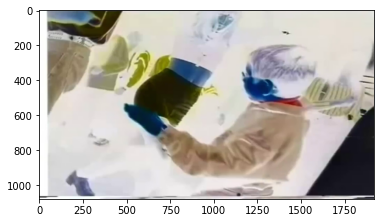

In [7]:
def convert_cmy(frame):
    cmy = 255 - frame
    return cmy


frame_cmy = convert_cmy(frame)
plt.imshow(frame_cmy)

**7 -** Separe o vídeo original em 3 subclips:
- Segundos 0 ao 2: Aplicar conversão para cmy
- Segundos 2 ao 4: Aplicar reflexão no eixo y
- Segundos 4 em diante: Aplicar detecção de borda

**Una esses clips em um único vídeo e exiba o resultado.**

In [ ]:
part1 = video.subclip(0,2).fl_image(convert_cmy)
part2 = video.subclip(2,4).fl_image(reflect)
part3 = video.subclip(4).fl_image(deteccao_bordas)

parts = mpe.concatenate_videoclips([part1, part2, part3])
parts.ipython_display(width=480)

**8 -** Salve o vídeo resultante da última etapa com o nome "resultado.mp4".

In [ ]:
parts.write_videofile('resultado.mp4')